<a href="https://colab.research.google.com/github/lcnychh/da_nychh/blob/master/DA_Unit3_Project3_Team1_Cancer_FINAL_submit_0813.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Background

The data used in this analysis is the Chronic Disease Indicators (CDI) dataset sourced from the CDC. This is a very large dataset containing nearly 815,000 records across a total of 124 indicators related to chronic disease. The dataset was created in 2016 and last updated in January 2020. Definition of each indicator as well as data parameters can be found in the [2015 Morbidity and Mortality Weekly Report](https://www.cdc.gov/mmwr/pdf/rr/rr6401.pdf) (MMWR).

#Data Acquisition

The data was acquired by accessing the CDI dataset via API using the Python pandas and sodapy grab-and-go codes provided by the CDC [here](https://dev.socrata.com/foundry/chronicdata.cdc.gov/g4ie-h725). We did a simple examination of the CDI dataframe by pulling the first 5 records and identifying the shape of the dataframe, which is 816,000 rows and 26 columns. We also did some simple queries to get a basic sense of the dataframe, including the number of unique topics and unique locations (i.e. states). Our research topic for analysis was on Cancer.

In [ ]:
import pandas as pd

In [ ]:
!pip install sodapy

In [ ]:
from sodapy import Socrata

In [ ]:
#establishing the connection with CDC
client = Socrata("chronicdata.cdc.gov", None)

In [ ]:
# access CDC data
results = client.get("g4ie-h725", limit=816000)

In [ ]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
results_df.shape

(814937, 26)

In [ ]:
results_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
0,2010,2014,WA,Washington,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...","per 100,000",Average Annual Age-adjusted Rate,15.2,15.2,14.6,15.8,Gender,Male,"{'latitude': '47.52227862900048', 'longitude':...",53,CAN,CAN7_2,AVGANNAGEADJRATE,GENDER,GENM,6,2956,NaN,NaN
1,2009,2013,OR,Oregon,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Average Annual Age-adjusted Rate,513.5,513.5,510.3,516.8,Race/Ethnicity,"White, non-Hispanic","{'latitude': '44.56744942400047', 'longitude':...",41,CAN,CAN4_1,AVGANNAGEADJRATE,RACE,WHT,12,2452,NaN,NaN
2,2009,2013,FL,Florida,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,NaN,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '28.932040377000476', 'longitude'...",12,CAN,CAN10_2,AVGANNCRDRATE,RACE,AIAO,30,1112,~,Data not shown because of too few respondents ...
3,2010,2014,MI,Michigan,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence",NaN,Average Annual Number,6726,6726,NaN,NaN,Race/Ethnicity,"White, non-Hispanic","{'latitude': '44.6613195430005', 'longitude': ...",26,CAN,CAN8_1,AVGANNNMBR,RACE,WHT,50,436,NaN,NaN
4,2010,2014,KY,Kentucky,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Crude Rate,NaN,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '37.645970271000465', 'longitude'...",21,CAN,CAN8_1,AVGANNCRDRATE,RACE,AIAO,36,235,~~~~,The state registry opted not to present state-...


In [ ]:
results_df.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'topic', 'question', 'datavalueunit', 'datavaluetype', 'datavalue',
       'datavaluealt', 'lowconfidencelimit', 'highconfidencelimit',
       'stratificationcategory1', 'stratification1', 'geolocation',
       'locationid', 'topicid', 'questionid', 'datavaluetypeid',
       'stratificationcategoryid1', 'stratificationid1',
       ':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8',
       'datavaluefootnotesymbol', 'datavaluefootnote'],
      dtype='object')

In [ ]:
results_df.topic.unique()

array(['Cancer', 'Mental Health', 'Overarching Conditions', 'Diabetes',
       'Oral Health', 'Tobacco', 'Arthritis', 'Disability', 'Alcohol',
       'Asthma', 'Older Adults', 'Cardiovascular Disease',
       'Nutrition, Physical Activity, and Weight Status',
       'Chronic Obstructive Pulmonary Disease', 'Immunization',
       'Chronic Kidney Disease', 'Reproductive Health'], dtype=object)

In [ ]:
results_df.locationabbr.unique()

array(['WA', 'OR', 'FL', 'MI', 'KY', 'NJ', 'IA', 'GA', 'ME', 'NV', 'MA',
       'VA', 'KS', 'MS', 'RI', 'AL', 'ID', 'LA', 'DC', 'NE', 'MT', 'VT',
       'NC', 'WY', 'MD', 'CO', 'CT', 'DE', 'MN', 'SD', 'AK', 'TN', 'OK',
       'SC', 'WV', 'HI', 'AZ', 'AR', 'TX', 'NY', 'WI', 'PA', 'NM', 'ND',
       'CA', 'US', 'MO', 'UT', 'OH', 'IN', 'NH', 'IL', 'GU', 'VI', 'PR'],
      dtype=object)

# Research Questions

1) Overall Cancer Mortality: trend the data by state, gender, year, and race/ethnicity and identify the highest & lowest mortality rate in each.

2) For each of the following: What is the mortality rate over time, by state, race/ethnicity and gender?  What is the trend observed?


*   Melanoma
*   Lung Cancer










#Data Wrangling & EDA

##Basic Data Insights

Since we were assigned Cancer as our topic of analysis, we first subsetted the CDI dataset to focus on the Cancer data. We pulled the first 5 records of this subset, which has about 104K records. Next, we queried the unique data sources and also unique questions or indicators in the Cancer dataset, as well as the count of each. 

In [ ]:
can_cdi_df = results_df[results_df['topic']=='Cancer']

In [ ]:
can_cdi_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
0,2010,2014,WA,Washington,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...","per 100,000",Average Annual Age-adjusted Rate,15.2,15.2,14.6,15.8,Gender,Male,"{'latitude': '47.52227862900048', 'longitude':...",53,CAN,CAN7_2,AVGANNAGEADJRATE,GENDER,GENM,6,2956,NaN,NaN
1,2009,2013,OR,Oregon,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Average Annual Age-adjusted Rate,513.5,513.5,510.3,516.8,Race/Ethnicity,"White, non-Hispanic","{'latitude': '44.56744942400047', 'longitude':...",41,CAN,CAN4_1,AVGANNAGEADJRATE,RACE,WHT,12,2452,NaN,NaN
2,2009,2013,FL,Florida,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Crude Rate,NaN,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '28.932040377000476', 'longitude'...",12,CAN,CAN10_2,AVGANNCRDRATE,RACE,AIAO,30,1112,~,Data not shown because of too few respondents ...
3,2010,2014,MI,Michigan,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence",NaN,Average Annual Number,6726,6726,NaN,NaN,Race/Ethnicity,"White, non-Hispanic","{'latitude': '44.6613195430005', 'longitude': ...",26,CAN,CAN8_1,AVGANNNMBR,RACE,WHT,50,436,NaN,NaN
4,2010,2014,KY,Kentucky,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Crude Rate,NaN,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '37.645970271000465', 'longitude'...",21,CAN,CAN8_1,AVGANNCRDRATE,RACE,AIAO,36,235,~~~~,The state registry opted not to present state-...


In [ ]:
can_cdi_df.shape

(104580, 26)

In [ ]:
can_cdi_df.datasource.unique()

array(['Death Certificate', 'Statewide central cancer registries',
       'BRFSS'], dtype=object)

In [ ]:
can_cdi_df.groupby(['datasource'])['datavalue'].count()

datasource
BRFSS                                   7336
Death Certificate                      31785
Statewide central cancer registries    36504
Name: datavalue, dtype: int64

In [ ]:
can_cdi_df.question.unique()

array(['Cancer of the colon and rectum (colorectal), mortality',
       'Invasive cancer (all sites combined), incidence',
       'Cancer of the oral cavity and pharynx, mortality',
       'Cancer of the lung and bronchus, incidence',
       'Invasive melanoma, incidence',
       'Invasive cancer (all sites combined), mortality',
       'Invasive cancer of the female breast, incidence',
       'Cancer of the lung and bronchus, mortality',
       'Invasive cancer of the prostate, incidence',
       'Cancer of the prostate, mortality',
       'Invasive cancer of the oral cavity or pharynx, incidence',
       'Melanoma, mortality', 'Cancer of the female cervix, mortality',
       'Papanicolaou smear use among adult women aged 21-65 years',
       'Invasive cancer of the cervix, incidence',
       'Cancer of the female breast, mortality',
       'Cancer of the colon and rectum (colorectal), incidence',
       'Mammography use among women aged 50-74 years',
       'Fecal occult blood test, 

In [ ]:
can_cdi_df.groupby(['question'])['datavalue'].count()

question
Cancer of the colon and rectum (colorectal), incidence                                  5292
Cancer of the colon and rectum (colorectal), mortality                                  4905
Cancer of the female breast, mortality                                                  3174
Cancer of the female cervix, mortality                                                  2340
Cancer of the lung and bronchus, incidence                                              5397
Cancer of the lung and bronchus, mortality                                              5289
Cancer of the oral cavity and pharynx, mortality                                        3954
Cancer of the prostate, mortality                                                       2850
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years    3033
Invasive cancer (all sites combined), incidence                                         5727
Invasive cancer (all sites combined), mortality              

##Data Tidying

Next, we wanted to perform some data tidying to exclude data irrelevant to our analysis. We also made sure to drop the missing values (NaN) in this dataset, specifically under the data value column. Since there are several different data value types, as shown by the groupby query, we decided to focus on data values that belong to average annual age-adjusted rate (number of annual deaths per 100,000 population) as the data value type, of which there are about 23K records. Then we subsetted the Cancer dataset on just the average annual age-adjusted rate (AAR) and pulled the first 5 records of that subset.  In addition, we queried the unique years in this subset, showing that the data span across 2008-2012 which is a substantial time period good for any trending over time, and we also converted the year column from string to date format for easier analysis later on.

In [ ]:
# drop missing values
clean_can_cdi_df = can_cdi_df.dropna(subset=['datavalue'])
clean_can_cdi_df.shape

(75625, 26)

In [ ]:
# number or rate?
clean_can_cdi_df.groupby(['datavaluetype'])['datavalue'].count()

datavaluetype
Age-adjusted Prevalence              3276
Average Annual Age-adjusted Rate    22763
Average Annual Crude Rate           22763
Average Annual Number               22763
Crude Prevalence                     4060
Name: datavalue, dtype: int64

In [ ]:
# filter to avg annual age-adjusted rate
clean_can_cdi_aar_df = clean_can_cdi_df[clean_can_cdi_df['datavaluetype']=='Average Annual Age-adjusted Rate']
clean_can_cdi_aar_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
0,2010,2014,WA,Washington,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...","per 100,000",Average Annual Age-adjusted Rate,15.2,15.2,14.6,15.8,Gender,Male,"{'latitude': '47.52227862900048', 'longitude':...",53,CAN,CAN7_2,AVGANNAGEADJRATE,GENDER,GENM,6,2956,NaN,NaN
1,2009,2013,OR,Oregon,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Average Annual Age-adjusted Rate,513.5,513.5,510.3,516.8,Race/Ethnicity,"White, non-Hispanic","{'latitude': '44.56744942400047', 'longitude':...",41,CAN,CAN4_1,AVGANNAGEADJRATE,RACE,WHT,12,2452,NaN,NaN
5,2010,2014,NJ,New Jersey,Statewide central cancer registries,Cancer,"Invasive melanoma, incidence","per 100,000",Average Annual Age-adjusted Rate,0.9,0.9,0.6,1.2,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '40.13057004800049', 'longitude':...",34,CAN,CAN9_1,AVGANNAGEADJRATE,RACE,BLK,46,489,NaN,NaN
6,2009,2013,WA,Washington,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Average Annual Age-adjusted Rate,556.9,556.9,554.2,559.6,Race/Ethnicity,"White, non-Hispanic","{'latitude': '47.52227862900048', 'longitude':...",53,CAN,CAN4_1,AVGANNAGEADJRATE,RACE,WHT,6,2956,NaN,NaN
11,2010,2014,IA,Iowa,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Age-adjusted Rate,91.3,91.3,57.2,135.5,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '42.46940091300047', 'longitude':...",19,CAN,CAN8_1,AVGANNAGEADJRATE,RACE,AIAO,16,281,NaN,NaN


In [ ]:
clean_can_cdi_aar_df.shape

(22763, 26)

In [ ]:
# count of unique years
clean_can_cdi_aar_df['yearstart'].unique()

array(['2010', '2009', '2008', '2012', '2011'], dtype=object)

In [ ]:
clean_can_cdi_aar_df['date_year'] = pd.to_datetime(clean_can_cdi_aar_df['yearstart'])
clean_can_cdi_aar_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote,date_year
0,2010,2014,WA,Washington,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...","per 100,000",Average Annual Age-adjusted Rate,15.2,15.2,14.6,15.8,Gender,Male,"{'latitude': '47.52227862900048', 'longitude':...",53,CAN,CAN7_2,AVGANNAGEADJRATE,GENDER,GENM,6,2956,NaN,NaN,2010-01-01
1,2009,2013,OR,Oregon,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Average Annual Age-adjusted Rate,513.5,513.5,510.3,516.8,Race/Ethnicity,"White, non-Hispanic","{'latitude': '44.56744942400047', 'longitude':...",41,CAN,CAN4_1,AVGANNAGEADJRATE,RACE,WHT,12,2452,NaN,NaN,2009-01-01
5,2010,2014,NJ,New Jersey,Statewide central cancer registries,Cancer,"Invasive melanoma, incidence","per 100,000",Average Annual Age-adjusted Rate,0.9,0.9,0.6,1.2,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '40.13057004800049', 'longitude':...",34,CAN,CAN9_1,AVGANNAGEADJRATE,RACE,BLK,46,489,NaN,NaN,2010-01-01
6,2009,2013,WA,Washington,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Average Annual Age-adjusted Rate,556.9,556.9,554.2,559.6,Race/Ethnicity,"White, non-Hispanic","{'latitude': '47.52227862900048', 'longitude':...",53,CAN,CAN4_1,AVGANNAGEADJRATE,RACE,WHT,6,2956,NaN,NaN,2009-01-01
11,2010,2014,IA,Iowa,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Age-adjusted Rate,91.3,91.3,57.2,135.5,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '42.46940091300047', 'longitude':...",19,CAN,CAN8_1,AVGANNAGEADJRATE,RACE,AIAO,16,281,NaN,NaN,2010-01-01


## 1) Overall Cancer Mortality (Grace)

Because there are so many cancer indicators, we decided to focus on cancer mortality. To do so we first created a list out of the 8 mortality indicators, then subsetted the Cancer AAR dataset on those. Before proceeding to plotting the data, we converted the data values from string to numeric and also loaded the visualization packages. We created several different graphs to plot the overall mortality data by cancer overall as well as over state, gender, year, and race/ethnicity. Subsequent analyses are on 2 different types of cancer: melanoma and lung cancer. These were chosen after excluding gender-specific cancers (breast, cervix and prostate) and the invasive cancer indicator which is all-inclusive.

In [ ]:
clean_can_cdi_aar_df['question'].unique()

array(['Cancer of the colon and rectum (colorectal), mortality',
       'Invasive cancer (all sites combined), incidence',
       'Invasive melanoma, incidence',
       'Cancer of the lung and bronchus, incidence',
       'Cancer of the prostate, mortality',
       'Cancer of the oral cavity and pharynx, mortality',
       'Melanoma, mortality',
       'Invasive cancer of the prostate, incidence',
       'Cancer of the lung and bronchus, mortality',
       'Invasive cancer of the female breast, incidence',
       'Invasive cancer (all sites combined), mortality',
       'Invasive cancer of the oral cavity or pharynx, incidence',
       'Invasive cancer of the cervix, incidence',
       'Cancer of the female cervix, mortality',
       'Cancer of the female breast, mortality',
       'Cancer of the colon and rectum (colorectal), incidence'],
      dtype=object)

In [ ]:
import numpy as np

In [ ]:
mortality = ['Melanoma, mortality', 'Cancer of the prostate, mortality',
       'Cancer of the female cervix, mortality',
       'Cancer of the colon and rectum (colorectal), mortality',
       'Cancer of the oral cavity and pharynx, mortality',
        'Cancer of the female breast, mortality',
       'Invasive cancer (all sites combined), mortality',
       'Cancer of the lung and bronchus, mortality']

In [ ]:
can_mort_df = clean_can_cdi_aar_df[clean_can_cdi_aar_df.question.isin(mortality)]
can_mort_df.question.unique()

array(['Cancer of the colon and rectum (colorectal), mortality',
       'Cancer of the prostate, mortality',
       'Cancer of the oral cavity and pharynx, mortality',
       'Melanoma, mortality',
       'Cancer of the lung and bronchus, mortality',
       'Invasive cancer (all sites combined), mortality',
       'Cancer of the female cervix, mortality',
       'Cancer of the female breast, mortality'], dtype=object)

In [ ]:
can_mort_df['datavalue'] = pd.to_numeric(can_mort_df['datavalue'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
can_mort_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote,date_year
0,2010,2014,WA,Washington,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...","per 100,000",Average Annual Age-adjusted Rate,15.2,15.2,14.6,15.8,Gender,Male,"{'latitude': '47.52227862900048', 'longitude':...",53,CAN,CAN7_2,AVGANNAGEADJRATE,GENDER,GENM,6,2956,NaN,NaN,2010-01-01
12,2010,2014,NV,Nevada,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...","per 100,000",Average Annual Age-adjusted Rate,17.8,17.8,17,18.7,Race/Ethnicity,"White, non-Hispanic","{'latitude': '39.493240390000494', 'longitude'...",32,CAN,CAN7_2,AVGANNAGEADJRATE,RACE,WHT,10,481,NaN,NaN,2010-01-01
18,2009,2013,AL,Alabama,Death Certificate,Cancer,"Cancer of the prostate, mortality","per 100,000",Average Annual Age-adjusted Rate,25.2,25.2,24.2,26.2,Overall,Overall,"{'latitude': '32.84057112200048', 'longitude':...",01,CAN,CAN11_2,AVGANNAGEADJRATE,OVERALL,OVR,29,94,NaN,NaN,2009-01-01
22,2009,2013,LA,Louisiana,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Age-adjusted Rate,3.6,3.6,3.1,4.1,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '31.31266064400046', 'longitude':...",22,CAN,CAN10_2,AVGANNAGEADJRATE,RACE,BLK,22,1697,NaN,NaN,2009-01-01
25,2010,2014,NE,Nebraska,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,2.0,2,1.6,2.4,Gender,Female,"{'latitude': '41.6410409880005', 'longitude': ...",31,CAN,CAN9_2,AVGANNAGEADJRATE,GENDER,GENF,19,2243,NaN,NaN,2010-01-01


In [ ]:
can_mort_df.shape

(10595, 27)

In [ ]:
can_mort_df.describe()

,datavalue
count,10595.000000
mean,40.750788
std,56.771370
min,0.200000
25%,3.500000
50%,17.500000
75%,45.000000
max,260.500000


In [ ]:
can_mort_df.groupby(['question'])['datavalue'].median()

question
Cancer of the colon and rectum (colorectal), mortality     14.1
Cancer of the female breast, mortality                     20.1
Cancer of the female cervix, mortality                      2.2
Cancer of the lung and bronchus, mortality                 40.9
Cancer of the oral cavity and pharynx, mortality            2.4
Cancer of the prostate, mortality                          19.8
Invasive cancer (all sites combined), mortality           154.6
Melanoma, mortality                                         2.7
Name: datavalue, dtype: float64

In [ ]:
can_mort_df.pivot_table(columns=can_mort_df['question'], index=can_mort_df['locationabbr'])

datavalue  ...                    
question     Cancer of the colon and rectum (colorectal), mortality  ... Melanoma, mortality
locationabbr                                                         ...                    
AK                                                    17.920000      ...            2.575000
AL                                                    16.217241      ...            2.600000
AR                                                    16.980645      ...            2.930000
AZ                                                    13.210000      ...            2.704000
CA                                                    13.232500      ...            1.854286
CO                                                    12.565000      ...            2.788000
CT                                                    11.465714      ...            2.510000
DC                                                    15.692308      ...            1.406250
DE                                                    13.986667      ...            2.946667
FL                                                    12.525000      ...            2.333333
GA                                                    14.025714      ...            2.312000
HI                                                    14.166667      ...            2.000000
IA                                                    15.923333      ...            2.955000
ID                                                    13.248148      ...            3.595000
IL                                                    16.153333      ...            2.540000
IN                                                    15.020000      ...            3.120000
KS                                                    14.630000      ...            3.166667
KY                                                    17.573333      ...            3.326667
LA                                                    15.336842      ...            2.064000
MA                                                    12.415000      ...            2.926667
MD                                                    13.254286      ...            2.352000
ME                                                    14.155000      ...            3.050000
MI                                                    14.642500      ...            2.128000
MN                                                    13.987500      ...            2.635000
MO                                                    15.188571      ...            3.185000
MS                                                    20.296000      ...            2.196000
MT                                                    15.756000      ...            3.000000
NC                                                    12.497500      ...            2.516000
ND                                                    16.230435      ...            2.305000
NE                                                    16.593333      ...            3.100000
NH                                                    13.610000      ...            2.880000
NJ                                                    14.345714      ...            2.010714
NM                                                    14.968571      ...            2.560000
NV                                                    15.589744      ...            3.076190
NY                                                    13.745714      ...            1.545714
OH                                                    14.654286      ...            2.520000
OK                                                    17.345000      ...            2.952000
OR                                                    14.445000      ...            3.250000
PA                                                    13.856000      ...            2.926667
RI                                                    13.035484      ...            2.615000
SC                                                    14.15

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


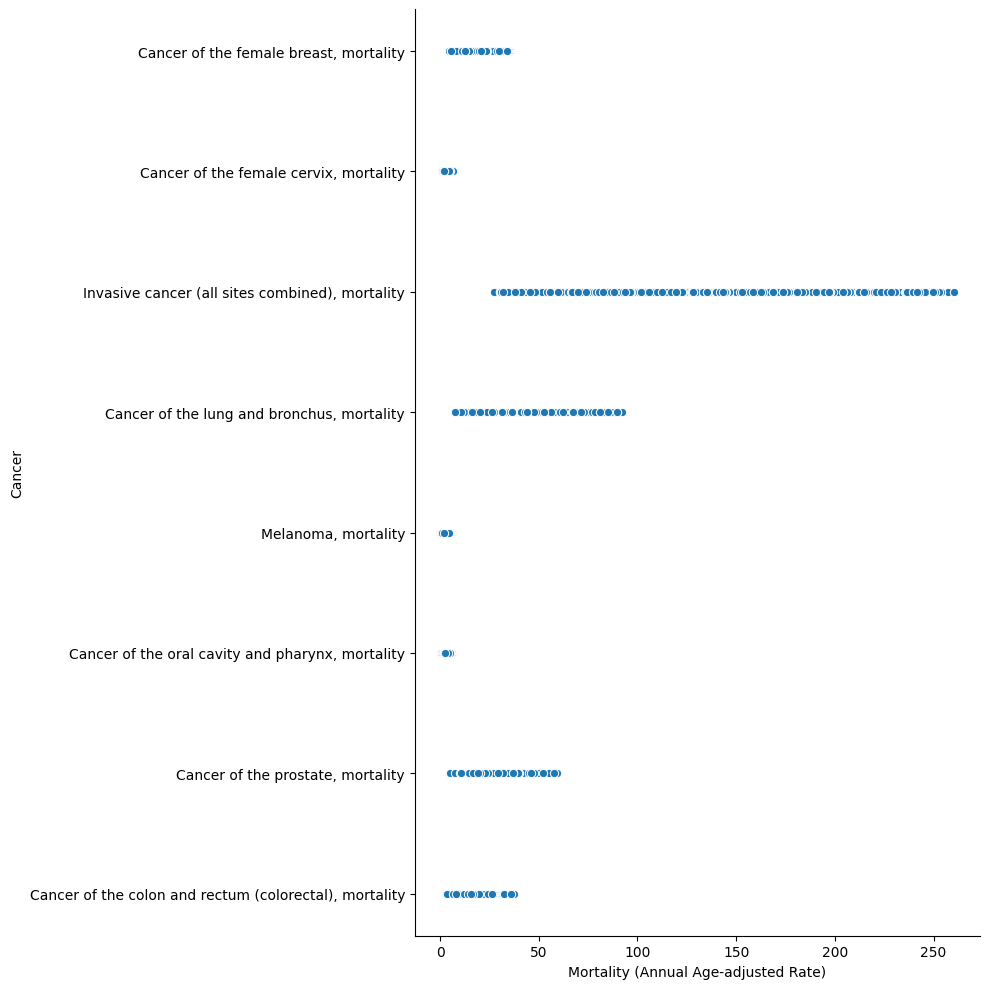

In [ ]:
# mortality rate by cancer 
sns.relplot(data=can_mort_df, x='datavalue', y='question', height=10, kind="scatter")
plt.xlabel("Mortality (Annual Age-adjusted Rate)")
plt.ylabel("Cancer")
plt.show()

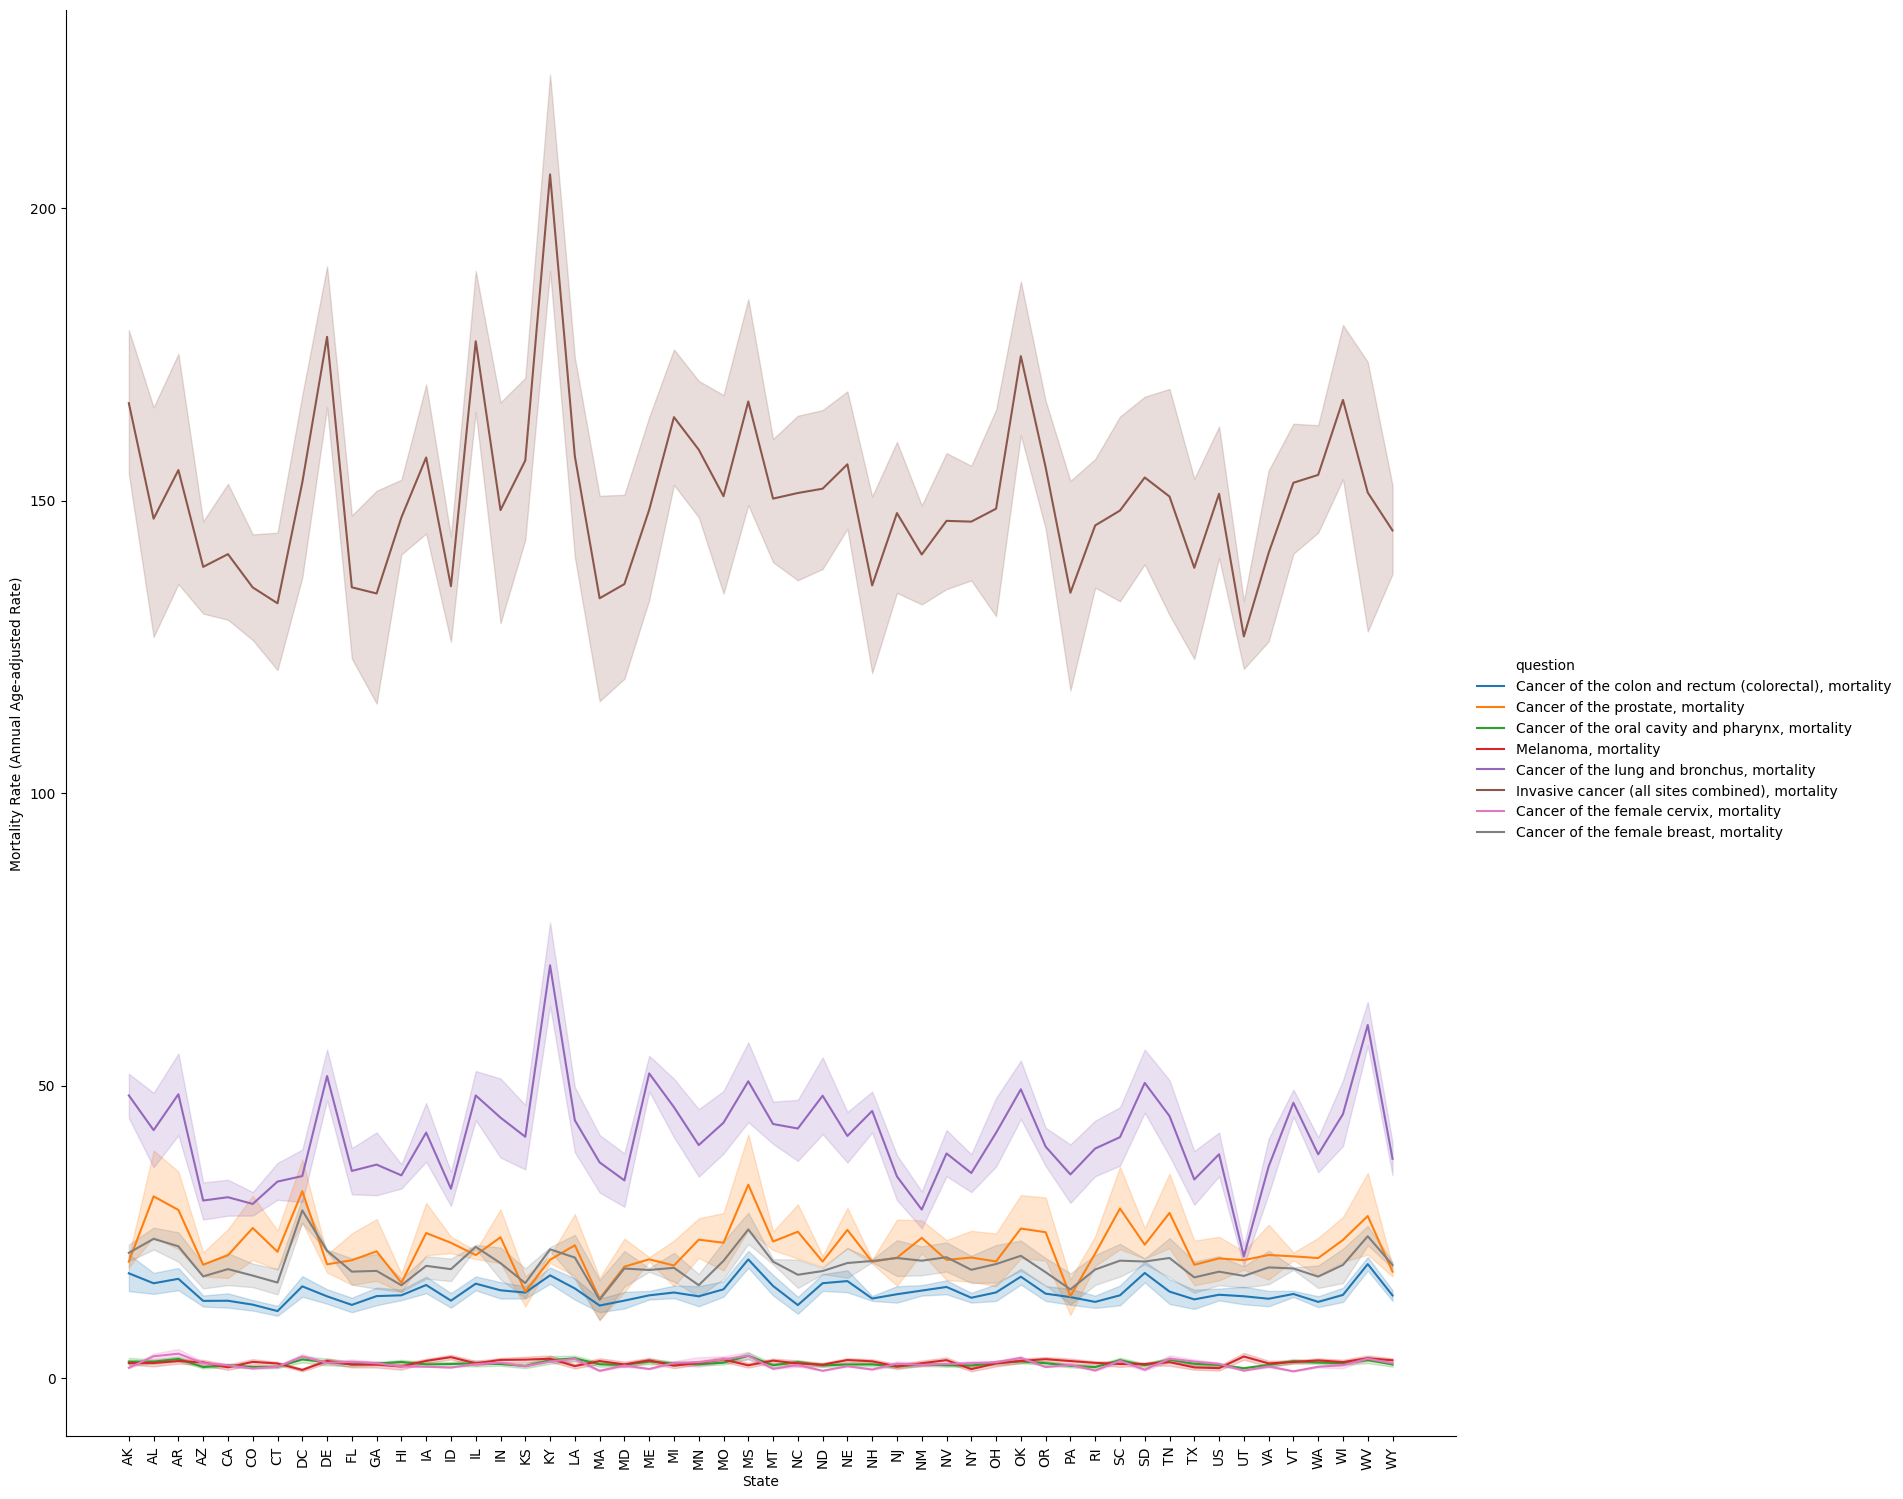

In [ ]:
# mortality rate by cancer over state

sns.relplot(data=can_mort_df, 
            x='locationabbr', y='datavalue', hue='question', height=15, kind="line")
plt.xlabel("State")
plt.ylabel("Mortality Rate (Annual Age-adjusted Rate)")
plt.xticks(rotation=90)

plt.show()

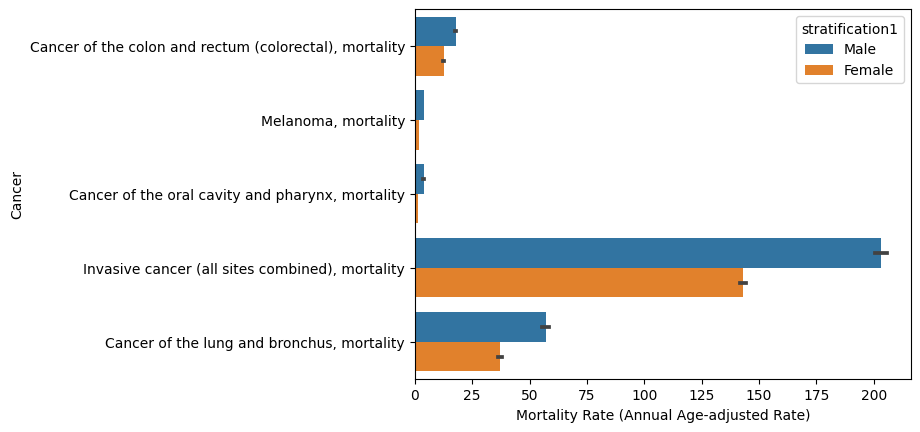

In [ ]:
# mortality rate by cancer over gender

sns.barplot(data=can_mort_df[can_mort_df['stratificationcategory1']=='Gender'],
            x='datavalue', y='question', hue='stratification1')
plt.ylabel("Cancer")
plt.xlabel("Mortality Rate (Annual Age-adjusted Rate)")

plt.show()

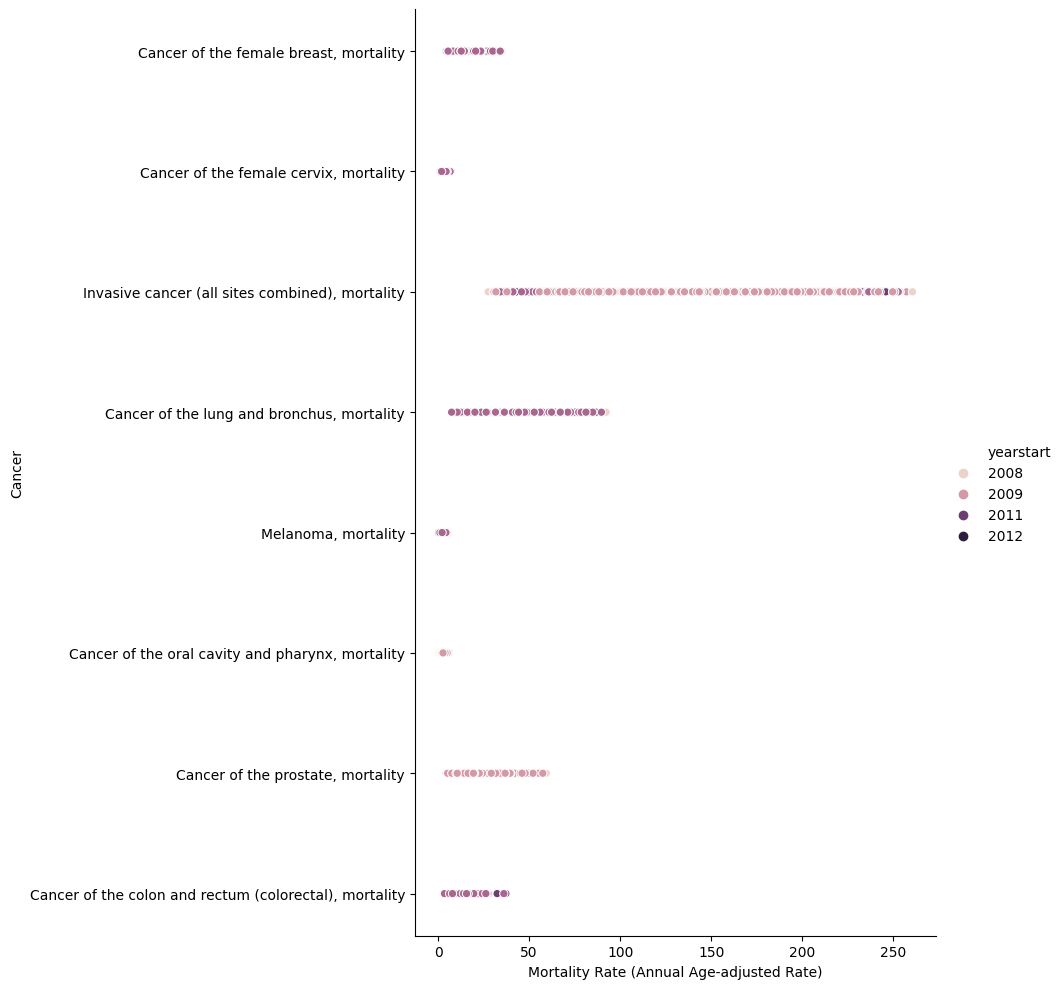

In [ ]:
# mortality rate by cancer over year - scatter

sns.relplot(data=can_mort_df,
            x='datavalue', y='question', hue='yearstart', height=10, kind="scatter")
plt.ylabel("Cancer")
plt.xlabel("Mortality Rate (Annual Age-adjusted Rate)")

plt.show()

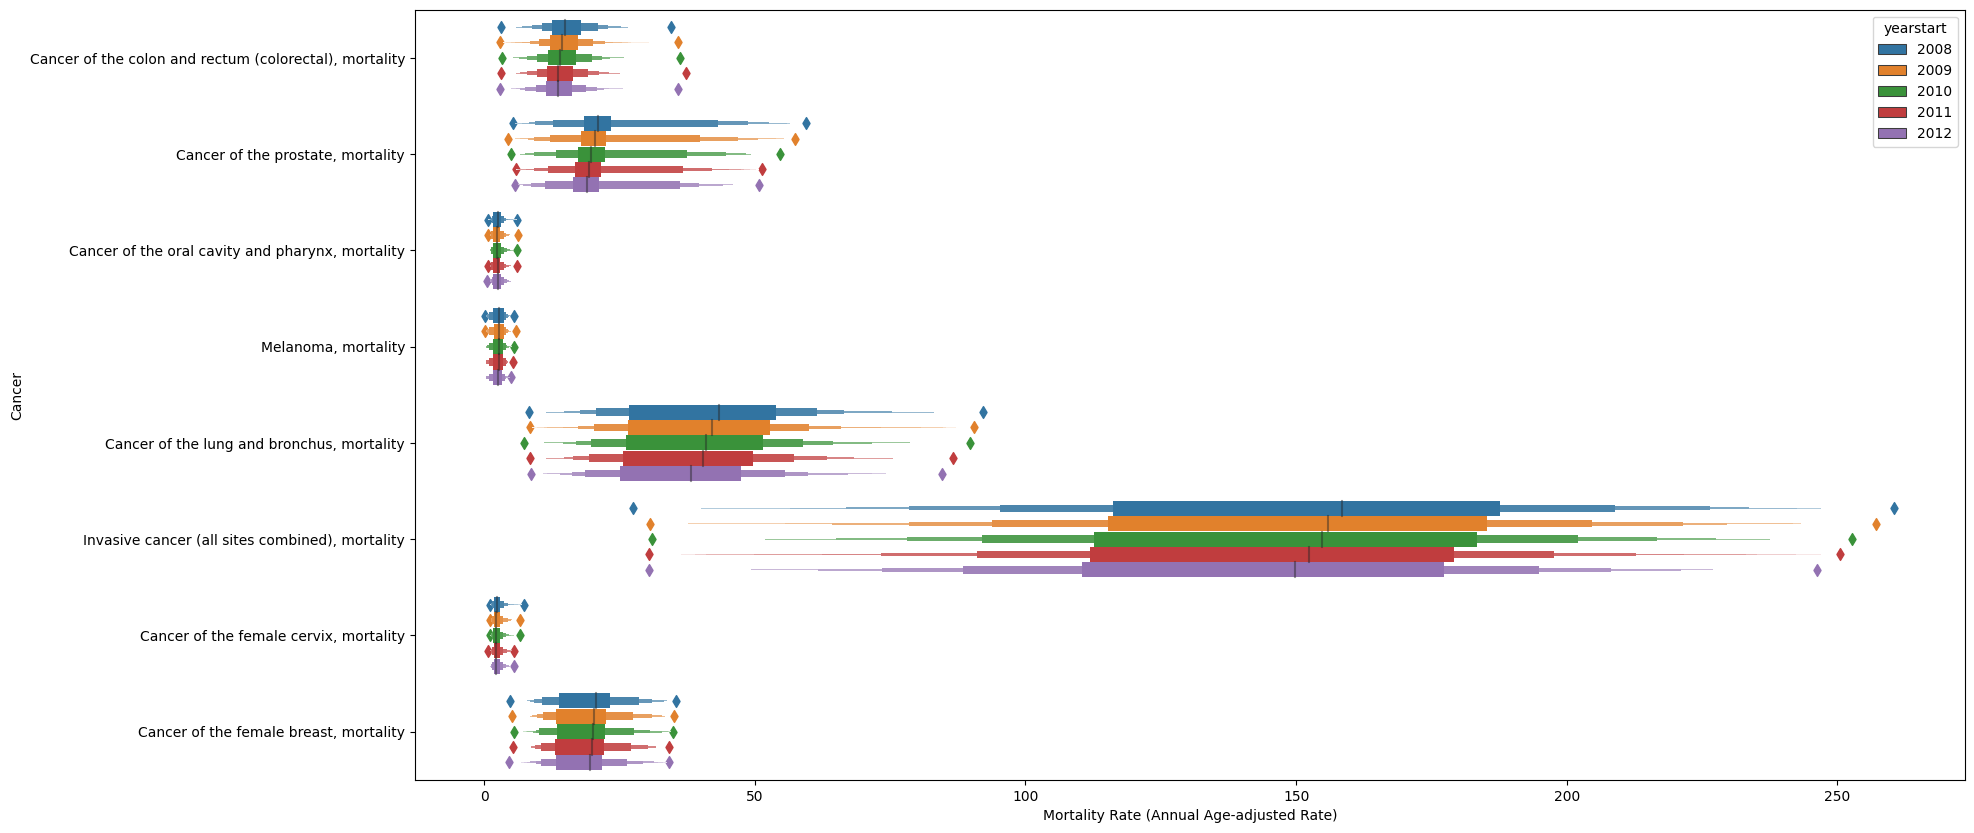

In [ ]:
# mortality rate by cancer over year - box
plt.figure(figsize=(20,10))

sns.boxenplot(data=can_mort_df,
            x='datavalue', y='question', hue='yearstart')
plt.ylabel("Cancer")
plt.xlabel("Mortality Rate (Annual Age-adjusted Rate)")

plt.show()

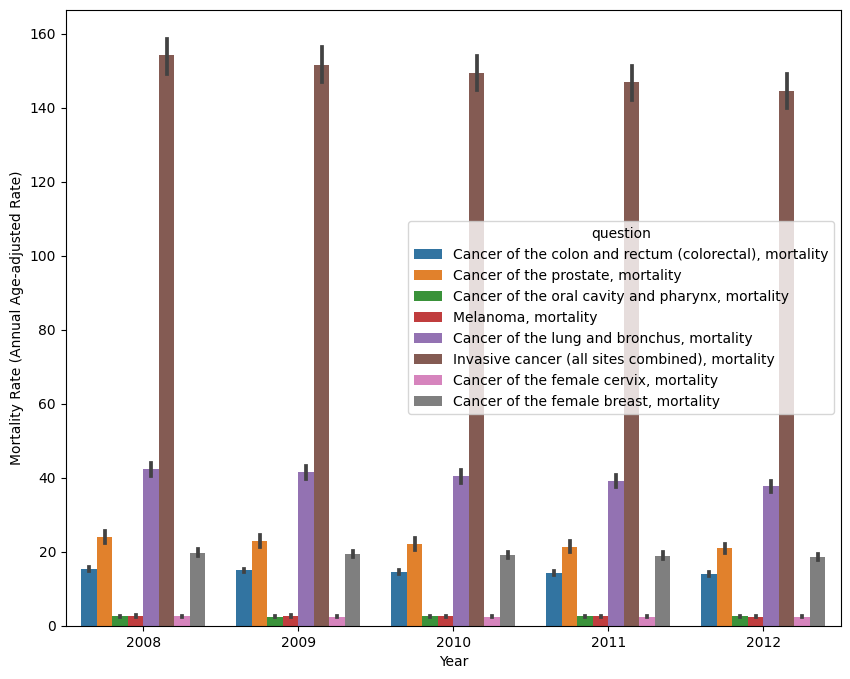

In [ ]:
# mortality rate by cancer over year - bar
plt.figure(figsize=(10,8))

sns.barplot(data=can_mort_df,
            x='yearstart', y='datavalue', hue='question')
plt.ylabel("Mortality Rate (Annual Age-adjusted Rate)")
plt.xlabel("Year")

plt.show()

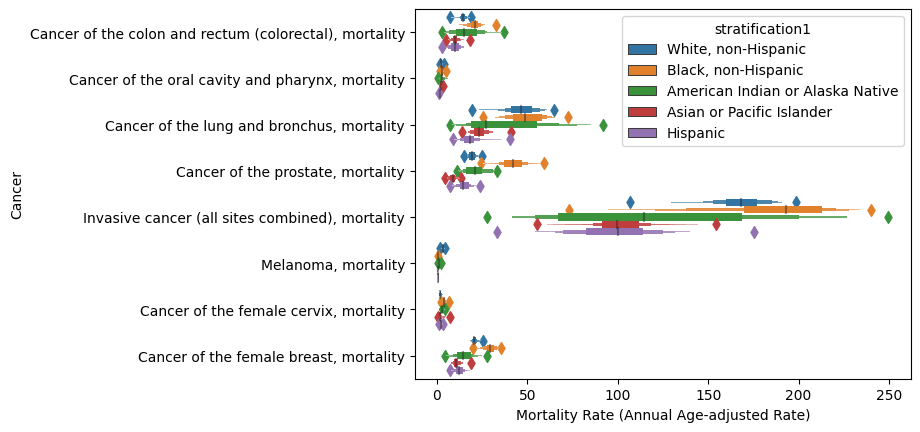

In [ ]:
# mortality rate by cancer over race/ethnicity - box

sns.boxenplot(data=can_mort_df[can_mort_df['stratificationcategory1']=='Race/Ethnicity'],
            x='datavalue', y='question', hue='stratification1')
plt.ylabel("Cancer")
plt.xlabel("Mortality Rate (Annual Age-adjusted Rate)")

plt.show()

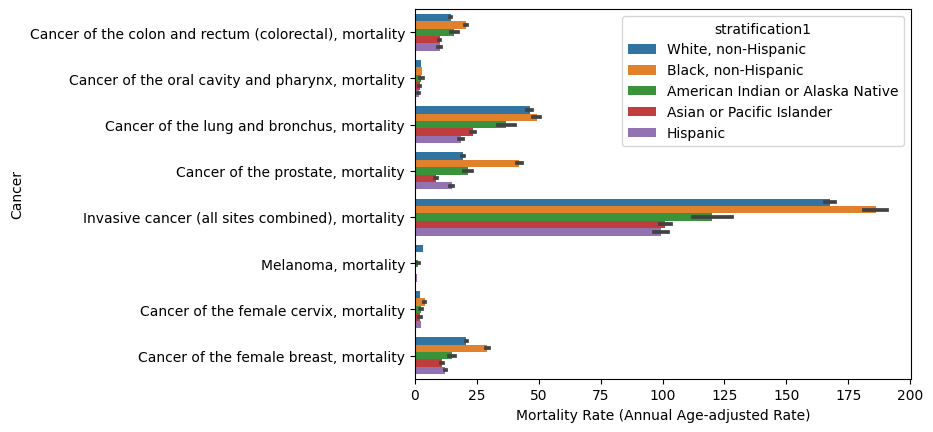

In [ ]:
# mortality rate by cancer over race/ethnicity - bar

sns.barplot(data=can_mort_df[can_mort_df['stratificationcategory1']=='Race/Ethnicity'],
            x='datavalue', y='question', hue='stratification1')
plt.ylabel("Cancer")
plt.xlabel("Mortality Rate (Annual Age-adjusted Rate)")

plt.show()

## 2) Melanoma Mortality (Linda)

In [ ]:
mel_mort_df = clean_can_cdi_aar_df[clean_can_cdi_aar_df['question']=='Melanoma, mortality']
mel_mort_df.shape

(1166, 27)

In [ ]:
mel_mort_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote,date_year
25,2010,2014,NE,Nebraska,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,2,2,1.6,2.4,Gender,Female,"{'latitude': '41.6410409880005', 'longitude': ...",31,CAN,CAN9_2,AVGANNAGEADJRATE,GENDER,GENF,19,2243,NaN,NaN,2010-01-01
179,2010,2014,AR,Arkansas,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,2.8,2.8,2.5,3,Overall,Overall,"{'latitude': '34.74865012400045', 'longitude':...",05,CAN,CAN9_2,AVGANNAGEADJRATE,OVERALL,OVR,15,998,NaN,NaN,2010-01-01
301,2010,2014,OH,Ohio,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,3.3,3.3,3.2,3.5,Race/Ethnicity,"White, non-Hispanic","{'latitude': '40.06021014100048', 'longitude':...",39,CAN,CAN9_2,AVGANNAGEADJRATE,RACE,WHT,38,587,NaN,NaN,2010-01-01
410,2010,2014,DE,Delaware,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,4,4,3.2,4.9,Gender,Male,"{'latitude': '39.008830667000495', 'longitude'...",10,CAN,CAN9_2,AVGANNAGEADJRATE,GENDER,GENM,43,1046,NaN,NaN,2010-01-01
492,2010,2014,KS,Kansas,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Age-adjusted Rate,4.6,4.6,4.1,5.2,Gender,Male,"{'latitude': '38.34774030000045', 'longitude':...",20,CAN,CAN9_2,AVGANNAGEADJRATE,GENDER,GENM,17,1287,NaN,NaN,2010-01-01


In [ ]:
mel_mort_df.groupby(['stratificationcategory1'])['datavalue'].count()

stratificationcategory1
Gender            516
Overall           260
Race/Ethnicity    390
Name: datavalue, dtype: int64

In [ ]:
mel_mort_df.datasource.unique()

array(['Death Certificate'], dtype=object)

In [ ]:
# convert data values to numeric
mel_mort_df['datavalue'] = pd.to_numeric(mel_mort_df['datavalue'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# pivot by state
mel_mort_df.pivot_table(mel_mort_df, index=['locationabbr'])

,datavalue
locationabbr,
AK,2.575000
AL,2.600000
AR,2.930000
AZ,2.704000
CA,1.854286
CO,2.788000
CT,2.510000
DC,1.406250
DE,2.946667


In [ ]:
mel_mort_df.describe()

,datavalue
count,1166.000000
mean,2.578216
std,1.205384
min,0.200000
25%,1.700000
50%,2.700000
75%,3.500000
max,5.900000


In [ ]:
# trend over time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Melanoma Mortality over time and by state

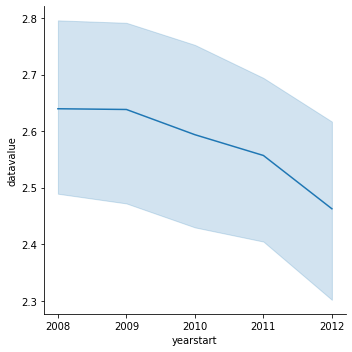

In [ ]:
# melanoma mortality rate over time
sns.relplot(data=mel_mort_df, x='yearstart', y='datavalue', kind="line")

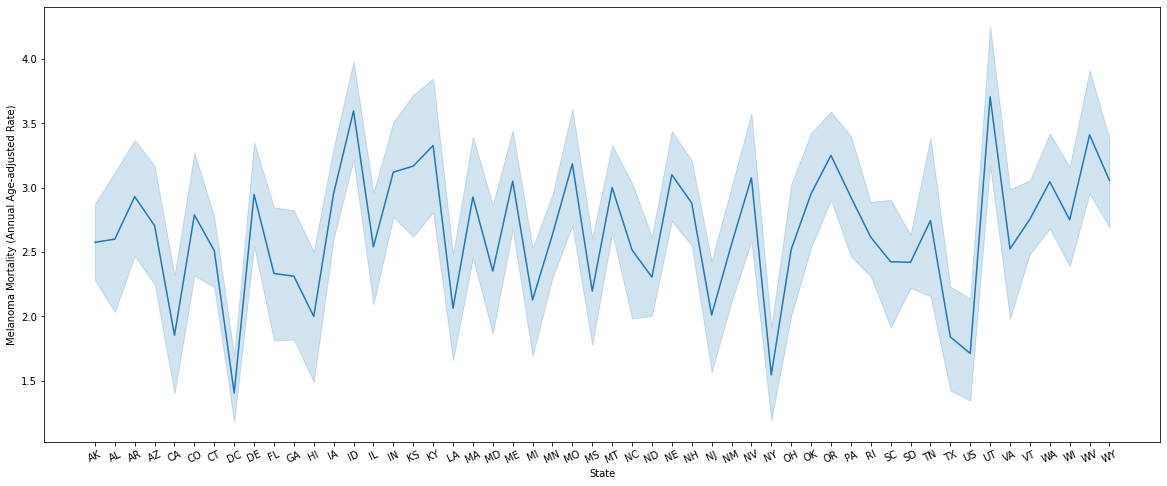

In [ ]:
# melanoma mortality rate by state
plt.figure(figsize=(20,8))
plt.xticks(rotation=25)

sns.lineplot(data=mel_mort_df, x='locationabbr', y='datavalue')
plt.xlabel("State")
plt.ylabel("Melanoma Mortality (Annual Age-adjusted Rate)")

plt.show()

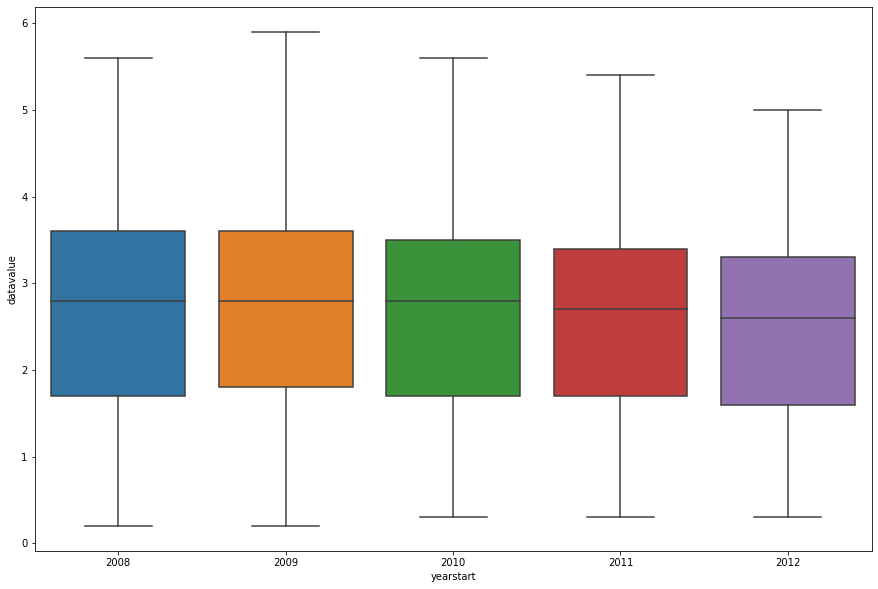

In [ ]:
# melanoma mortality rate over time
plt.figure(figsize=(15,10))
sns.boxplot(data=mel_mort_df, x='yearstart',y='datavalue')
plt.show()

Melanoma Mortality By Race/Ethnicity

<Figure size 2160x1440 with 0 Axes>

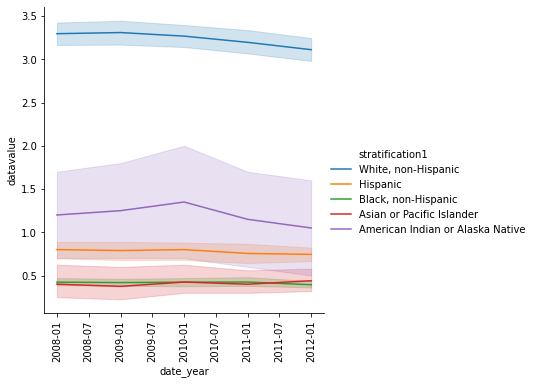

In [ ]:
# melanoma mortality by race/ethnicity over time
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=mel_mort_df[(mel_mort_df['stratificationcategory1']=='Race/Ethnicity')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.xticks(rotation=90)
plt.show()

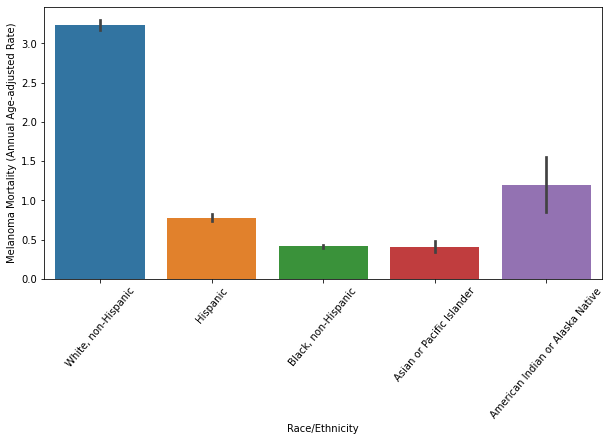

In [ ]:
# melanoma mortality rate by race/ethnicity
plt.figure(figsize=(10,5))
sns.barplot(data=mel_mort_df[mel_mort_df['stratificationcategory1']=='Race/Ethnicity'],
            x='stratification1',y='datavalue')
plt.xlabel("Race/Ethnicity")
plt.ylabel("Melanoma Mortality (Annual Age-adjusted Rate)")
plt.xticks(rotation=50)
plt.show()

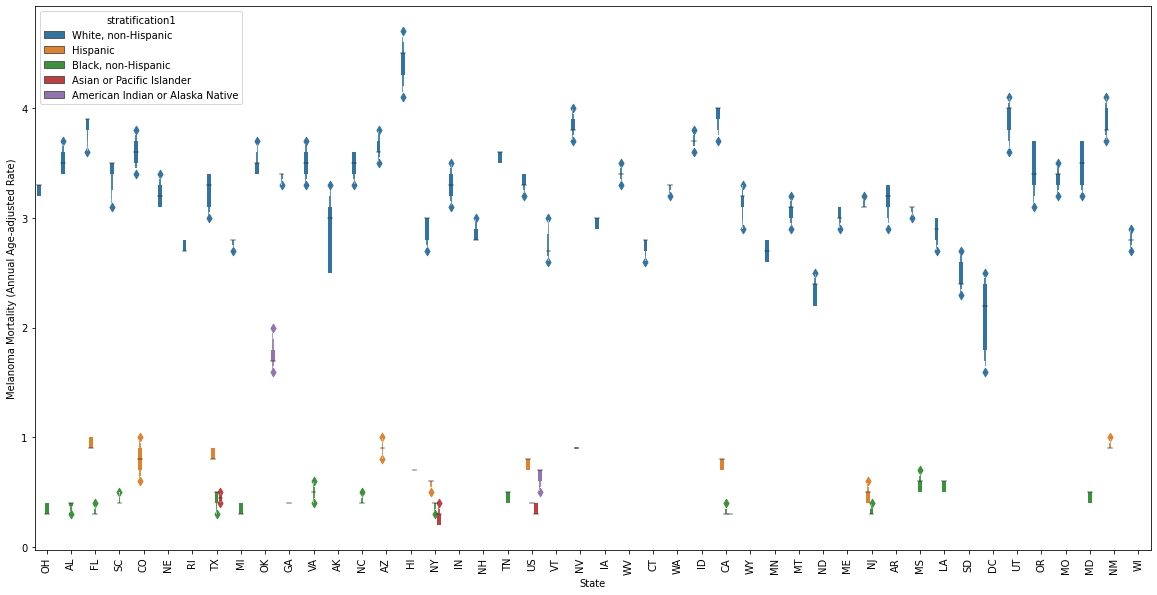

In [ ]:
# melanoma mortality rate by race/ethnicity over state
plt.figure(figsize=(20,10))

sns.boxenplot(data=mel_mort_df[(mel_mort_df['stratificationcategory1']=='Race/Ethnicity')], 
            x='locationabbr', y='datavalue', hue='stratification1')
plt.xlabel("State")
plt.ylabel("Melanoma Mortality (Annual Age-adjusted Rate)")
plt.xticks(rotation=90)
plt.show()

Melanoma Mortality By Gender

<Figure size 2160x1440 with 0 Axes>

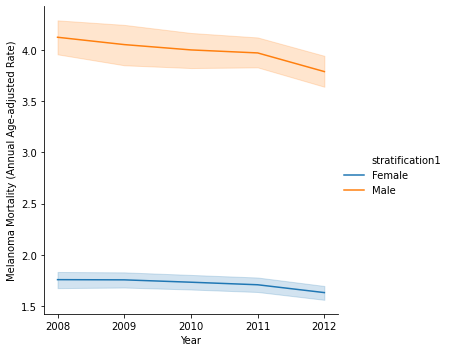

In [ ]:
# melanoma mortality rate by gender over year
plt.figure(figsize=(30,20))
sns.relplot(data=mel_mort_df[(mel_mort_df['stratificationcategory1']=='Gender')], 
            x='yearstart', y='datavalue', hue='stratification1', kind="line")
plt.xlabel("Year")
plt.ylabel("Melanoma Mortality (Annual Age-adjusted Rate)")
plt.show()

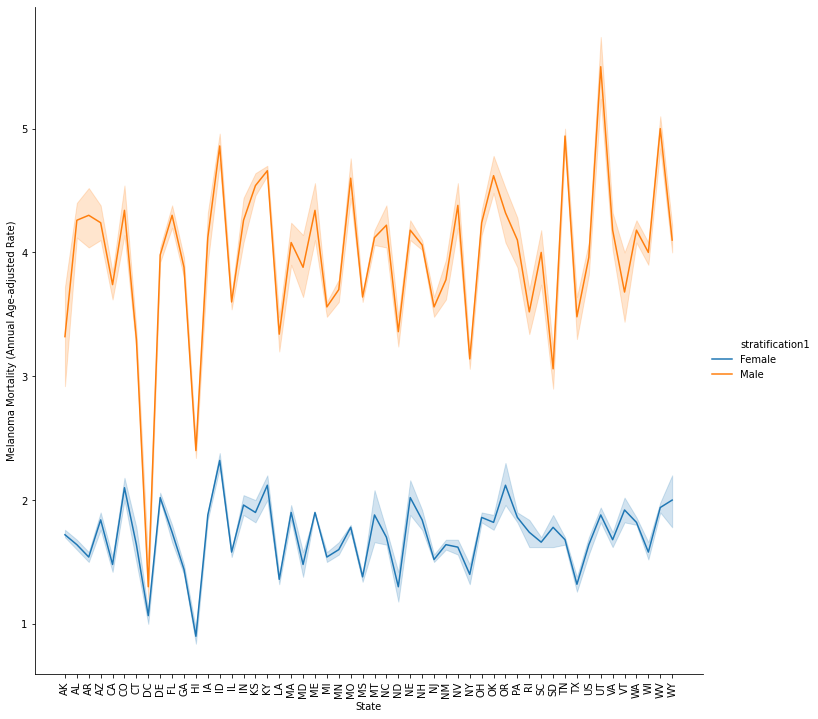

In [ ]:
# melanoma mortality rate by gender over state
sns.relplot(data=mel_mort_df[(mel_mort_df['stratificationcategory1']=='Gender')], 
            x='locationabbr', y='datavalue', hue='stratification1', height=10, kind="line")
plt.xlabel("State")
plt.ylabel("Melanoma Mortality (Annual Age-adjusted Rate)")
plt.xticks(rotation=90)

plt.show()

## 3) Lung Cancer Mortality (Min)

In [ ]:
lung_cdi_dc_df = clean_can_cdi_aar_df[(clean_can_cdi_aar_df['question']=='Cancer of the lung and bronchus, mortality')]
lung_cdi_dc_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote,date_year
49,2010,2014,ID,Idaho,Death Certificate,Cancer,"Cancer of the lung and bronchus, mortality","per 100,000",Average Annual Age-adjusted Rate,25.8,25.8,15.6,39.5,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '43.682630005000476', 'longitude'...",16,CAN,CAN8_2,AVGANNAGEADJRATE,RACE,AIAO,5,1687,NaN,NaN,2010-01-01
78,2010,2014,WI,Wisconsin,Death Certificate,Cancer,"Cancer of the lung and bronchus, mortality","per 100,000",Average Annual Age-adjusted Rate,77.5,77.5,64.3,92.2,Race/Ethnicity,American Indian or Alaska Native,"{'latitude': '44.39319117400049', 'longitude':...",55,CAN,CAN8_2,AVGANNAGEADJRATE,RACE,AIAO,41,3078,NaN,NaN,2010-01-01
174,2010,2014,VT,Vermont,Death Certificate,Cancer,"Cancer of the lung and bronchus, mortality","per 100,000",Average Annual Age-adjusted Rate,54.5,54.5,51,58.1,Gender,Male,"{'latitude': '43.62538123900049', 'longitude':...",50,CAN,CAN8_2,AVGANNAGEADJRATE,GENDER,GENM,28,3218,NaN,NaN,2010-01-01
210,2010,2014,OH,Ohio,Death Certificate,Cancer,"Cancer of the lung and bronchus, mortality","per 100,000",Average Annual Age-adjusted Rate,25.1,25.1,21.2,29.4,Race/Ethnicity,Asian or Pacific Islander,"{'latitude': '40.06021014100048', 'longitude':...",39,CAN,CAN8_2,AVGANNAGEADJRATE,RACE,APIO,38,587,NaN,NaN,2010-01-01
251,2010,2014,IL,Illinois,Death Certificate,Cancer,"Cancer of the lung and bronchus, mortality","per 100,000",Average Annual Age-adjusted Rate,39.3,39.3,38.7,39.9,Gender,Female,"{'latitude': '40.48501028300046', 'longitude':...",17,CAN,CAN8_2,AVGANNAGEADJRATE,GENDER,GENF,34,1795,NaN,NaN,2010-01-01


In [ ]:
lung_cdi_dc_df.shape

(1763, 27)

In [ ]:
# Converting data value to numberic
lung_cdi_dc_df['datavalue'] = pd.to_numeric(lung_cdi_dc_df['datavalue'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 2160x1440 with 0 Axes>

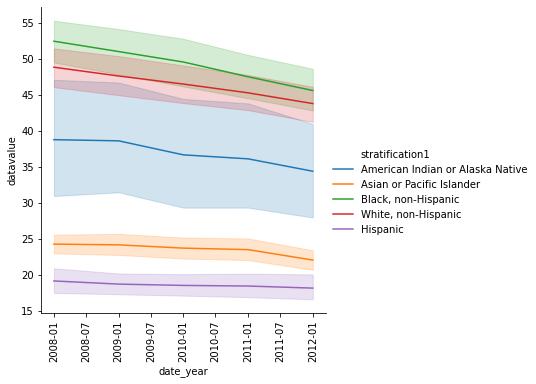

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=lung_cdi_dc_df[(lung_cdi_dc_df['stratificationcategory1']=='Race/Ethnicity')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.xticks(rotation=90)
plt.show()

<Figure size 2160x1440 with 0 Axes>

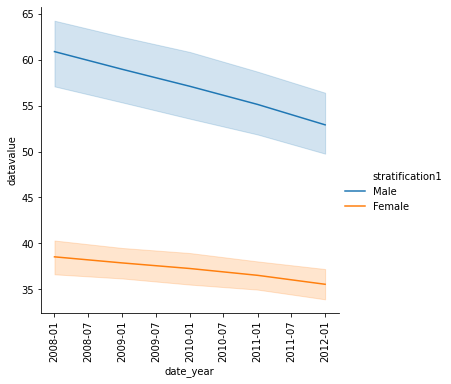

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=lung_cdi_dc_df[(lung_cdi_dc_df['stratificationcategory1']=='Gender')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.xticks(rotation=90)
plt.show()

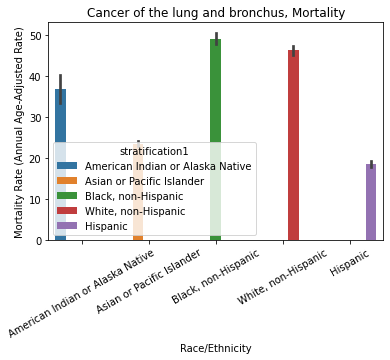

In [ ]:
sns.barplot(data=lung_cdi_dc_df[lung_cdi_dc_df['stratificationcategory1']=='Race/Ethnicity'],
            x='stratification1', y='datavalue', hue='stratification1')
plt.ylabel("Mortality Rate (Annual Age-Adjusted Rate)")
plt.xlabel("Race/Ethnicity")
plt.title('Cancer of the lung and bronchus, Mortality')
plt.xticks(rotation=30)
plt.show()

<Figure size 2160x1440 with 0 Axes>

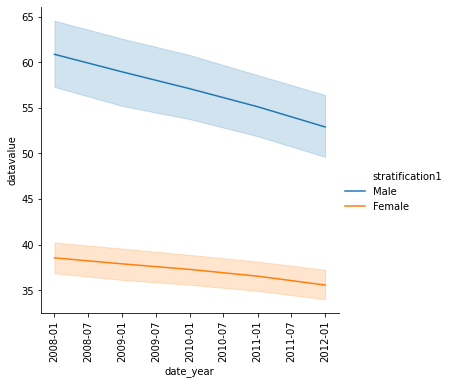

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=lung_cdi_dc_df[(lung_cdi_dc_df['stratificationcategory1']=='Gender')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.xticks(rotation=90)
plt.show()

In [ ]:
lung_cdi_dc_df.pivot_table(lung_cdi_dc_df, index=['locationabbr'])

,datavalue
locationabbr,
AK,48.328571
AL,42.385000
AR,48.525000
AZ,30.357500
CA,30.927500
CO,29.777500
CT,33.600000
DC,34.540625
DE,51.640000


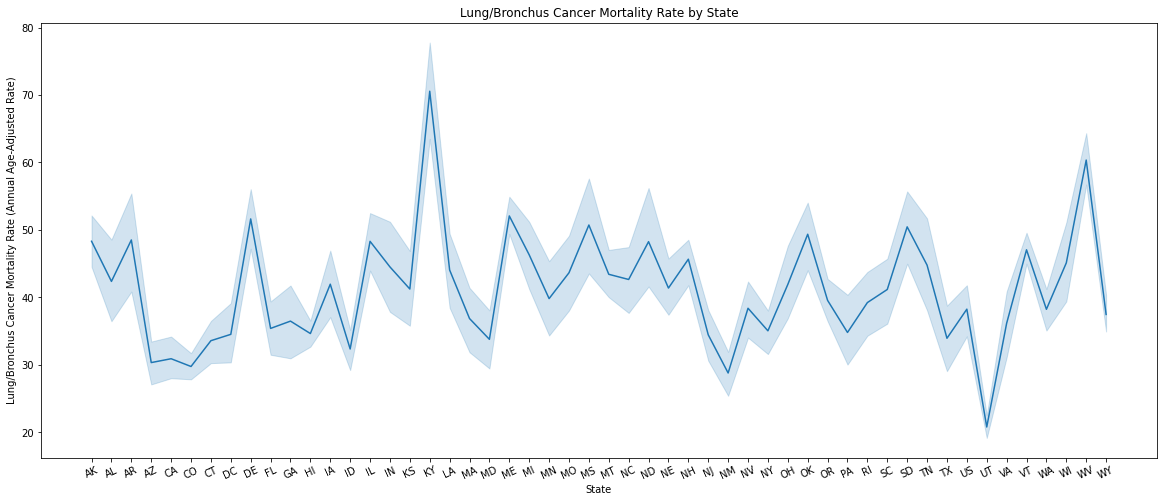

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=25)

sns.lineplot(data=lung_cdi_dc_df, x='locationabbr',y='datavalue')
plt.xlabel("State")
plt.ylabel("Lung/Bronchus Cancer Mortality Rate (Annual Age-Adjusted Rate)")
plt.title("Lung/Bronchus Cancer Mortality Rate by State")

plt.show()

# Conclusions

1) Overall:


*   **Overall comparison** among the 7 different types of cancer (excluding invasive) shows that lung/bronchial cancer has the highest mortality rate, followed by prostate cancer. In contrast, melanoma, cervical cancer and oral cancer have the lowest mortality rates.
*   Comparison by **state** shows that Kentucky has the highest mortality rate for lung/bronchial cancer while Utah has the lowest, and this trend is reflected by invasive cancer as well.
* Comparison by **gender** shows that overall (i.e. invasive), male has a highest mortality rate than female, which is also true for the 4 types of cancer of interest. However, there is a larger difference between male and female in the mortality rate for lung/bronchial cancer than melanoma, oral, and colon cancer.
* Comparison **over time by year** shows that overall, cancer mortality rate is on a downward trend over the years, most significantly for lung/bronchial cancer and prostate cancer. This trend is best demonstrated by the use of an enhanced box plot. On the other hand, the bar graph shows that over the years, the distribution of mortality rates remains roughly the same among the different types of cancer, in that mortality rate is in a descending order from lung/bronchial, prostate, breast, colon, followed by melanoma, cervical and oral cancer. 
* Comparison by **race/ethnicity** shows that overall, Blacks have the highest mortality rate, which is also the case for colon, prostate, lung/bronchial and breast cancer. In addition, Whites and American Indian/Alaska Natives also present high cancer mortality rates. Hispanics have about the same mortality rate as Asians or lower across the different types of cancer, except for prostate cancer. These trends are best demonstrated by the use of bar graph.







2) Melanoma: 

*   The mortality rate for melanoma has declined over time for years studied, 2008-2012. Indiana and Utah have the highest rate of mortality for melanoma, with a mean of 3.70 and 3.59, respectively; New York and DC have the lowest mortality rate, with a mean of 1.55 and 1.41, respectively. The overall mean for melanoma is 2.58. The median is 2.7 and the 25% and 75% quartiles are 1.7 and 3.5, respectively, as the boxplot shows. No outliers appear.

*   For race/ethnicities, the mortality rate have been relatively the same over time, with Whites and American Indians or Alaskan Natives having a slight decrease. Whites have significantly higher rate of mortality of melanoma than any other race/ethnicities, followed by American Indians or Alaskan Natives, Hispanic, and lastly, Blacks and Asians or Pacific Islanders. Those states with Whites having the highest mortality rate are Hawaii, Utah, and New Mexico.

*   For gender, males have significantly higher mortality rates than females. The trend in mortality rate for both genders have been steady with a decrease starting to show from 2011.  Comparing states, Utah and Indiana have the highest mortality rate for males and Oregon and Indiana have the highest mortality rate for females. DC has the lowest mortality rate for males and females.

3) Lung Cancer:


*   From the analysis on lung and bronchus cancer mortality, we discovered that 
Black, followed by White have the highest lung and bronchus cancer mortality 
rate and Hispanic have the lowest mortality rate.
*   From our analysis on gender mortality rate, it showed that males have a significant higher mortality rate than females, however it is showing that the mortality rate are trending down over time for both genders. 
*   An analysis was also performed on state mortality rate on lung and bronchus cancer. The top 3 states with the highest mortality rate are Kentucky (with AAR of 71 per 100,000), followed by West Virginia (with AAR of 60 per 100,000) and Maine (with AAR of 52 per 100,000) respectively.  Utah have the lowest lung cancer mortality rate (AAR of 21 per 100,000).


# Reference: 
1. https://healthdata.gov/dataset/us-chronic-disease-indicators-cdi

2. https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725

3. https://dev.socrata.com/consumers/getting-started.html

4. https://dev.socrata.com/foundry/chronicdata.cdc.gov/g4ie-h725

5. https://dev.socrata.com/docs/filtering.html
